# Reading and Writing Audio Files with (scikits.)audiolab

[back to overview page](index.ipynb)

http://scikits.appspot.com/audiolab

This has support for a lot of formats, but you may have to install it manually.

Works with pcm16, pcm24, pcm32, float32 (both WAV and WAVEX).

Audio data is returned as NumPy array, default `dtype` is `float64`.
This can be changed with the `dtype=` argument, but there is currently (in version 0.11.0) a bug (see <https://github.com/cournape/audiolab/issues/3>)!

Advantages:

* based on [libsndfile](http://www.mega-nerd.com/libsndfile/), can read WAV, OGG, FLAC, ...
  * see `audiolab.available_file_formats()` and `audiolab.available_encodings()`
* can read all variants of WAV files (including 24-bit and WAVEX)
* can read parts of audio files
* automatic type conversion and normalization

Disadvantages:

* in most cases, it has to be installed manually (but it's not too hard)
* there is a bug if `dtype != float64`
* needs NumPy (which normally isn't a problem)
* doesn't work on Python 3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Reading

sampling rate = 44100 Hz, length = 15 samples, channels = 7
dtype: float64


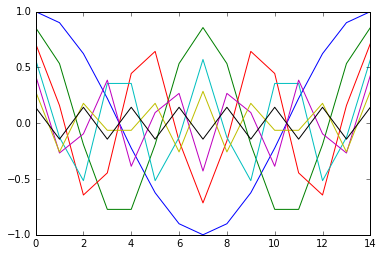

In [2]:
from scikits.audiolab import Sndfile, Format
import contextlib

with contextlib.closing(Sndfile('data/test_wav_pcm16.wav')) as f:
    print("sampling rate = {} Hz, length = {} samples, channels = {}".format(f.samplerate, f.nframes, f.channels))

    # default dtype: float64
    sig = f.read_frames(f.nframes)

print("dtype: {}".format(sig.dtype))

plt.plot(sig);

32-bit float and WAVEX are supported:

dtype: float64


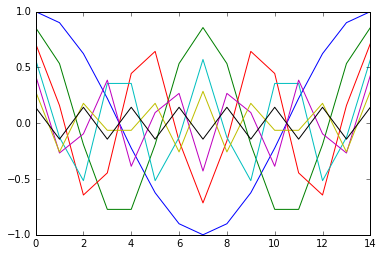

In [3]:
with contextlib.closing(Sndfile('data/test_wavex_float32.wav')) as f:
    sig = f.read_frames(f.nframes)

print("dtype: {}".format(sig.dtype))

plt.plot(sig);

But, if another type than `float64` is requested, things go wrong!

... at least in version 0.11.0, see https://github.com/cournape/audiolab/issues/3.

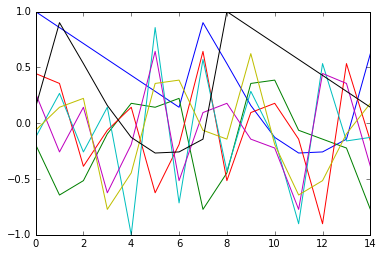

In [4]:
with contextlib.closing(Sndfile('data/test_wavex_pcm16.wav')) as f:
    sig = f.read_frames(f.nframes, dtype=np.float32)
    
plt.plot(sig);

Nice format information:

In [5]:
Sndfile('data/test_wavex_float32.wav').format

Major Format: WAVEX (Microsoft)
Encoding Format: 32 bit float
Endianness: file

## Writing

TODO

## Version

In [6]:
from scikits import audiolab
audiolab.__version__

'0.11.0'

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span resource="[_:publisher]" rel="dct:publisher">
    <span property="dct:title">Matthias Geier</span></span>
  has waived all copyright and related or neighboring rights to
  this work.
</p>